In [116]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import pickle
import json

### problem statement 

### Data gathering

In [42]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.columns  

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>

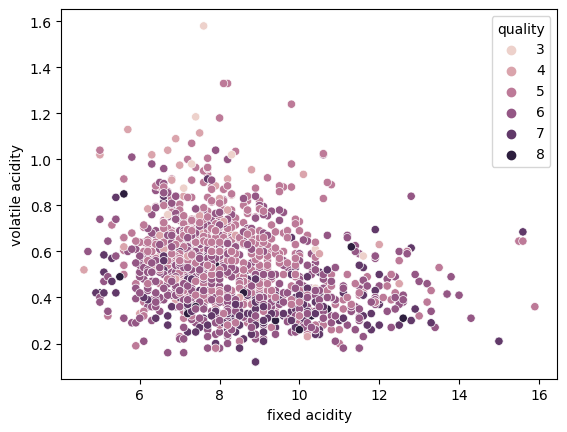

In [44]:
sns.scatterplot(x= df['fixed acidity'],y= df['volatile acidity'], hue = df['quality'])

In [45]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

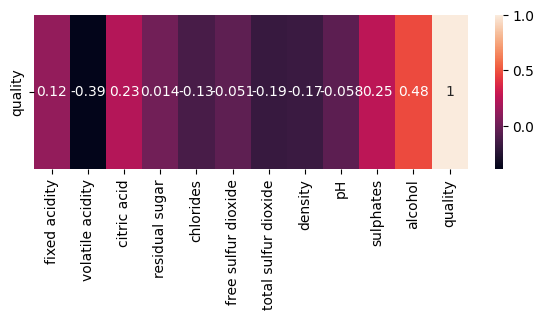

In [46]:
plt.figure(figsize=(7,2))
sns.heatmap(df.corr().tail(1),annot= True)

### EDA

#### 1.fixed acidity

In [22]:
df['fixed acidity'].isnull().sum()

0

In [25]:
df['fixed acidity'].nunique()

96

#### 2.volatile acidity

In [26]:
df['volatile acidity'].isnull().sum()

0

#### 3.citric acid

In [28]:
df['citric acid'].isnull().sum()

0

#### 4.residual sugar

In [29]:
df['residual sugar'].isnull().sum()

0

#### 5.chlorides

In [30]:
df['chlorides'].isnull().sum()

0

In [47]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## model training

In [54]:
df['new_qaulity'] =  [ 1 if i >=7 else 0   for i in df['quality']]
df['new_qaulity'].value_counts()    #sepeartion in good wine and bad wine

new_qaulity
0    1382
1     217
Name: count, dtype: int64

In [52]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [56]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [57]:
x = df.drop(['quality','new_qaulity'], axis =1)
y = df['new_qaulity']

In [60]:
x_train,x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=0 ,stratify=y)

In [139]:
# y_test

In [64]:
logistic_clf = LogisticRegression()
logistic_clf.fit(x_train,y_train)

LogisticRegression()

### evalution on testing dataset

In [140]:
y_predict_test = logistic_clf.predict(x_test)

confusion_matrix_test = confusion_matrix(y_test,y_predict_test)
print('confusion_matrix_test :\n', confusion_matrix_test)
print('*'*50)
classification_report_test = classification_report(y_test,y_predict_test)
print('classification_report_test :\n', classification_report_test)
print('*'*50)
accuracy_score_test = accuracy_score(y_test,y_predict_test)
print('accuracy_score_test :\n',accuracy_score_test)

confusion_matrix_test :
 [[263  14]
 [ 30  13]]
**************************************************
classification_report_test :
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       277
           1       0.48      0.30      0.37        43

    accuracy                           0.86       320
   macro avg       0.69      0.63      0.65       320
weighted avg       0.84      0.86      0.85       320

**************************************************
accuracy_score_test :
 0.8625


In [145]:
y_test[55:65]

1392    0
890     0
802     1
313     0
869     0
1299    0
74      0
273     0
128     1
353     0
Name: new_qaulity, dtype: int64

In [148]:
y_predict_test[55:65]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

### evalution training dataset  

In [77]:
y_predict_train = logistic_clf.predict(x_train)

confusion_matrix_train = confusion_matrix(y_train,y_predict_train)
print('confusion_matrix_train :\n', confusion_matrix_train)
print('*'*50)
classification_report_train = classification_report(y_train,y_predict_train)
print('classification_report_train :\n', classification_report_train)
print('*'*50)
accuracy_score_train = accuracy_score(y_train,y_predict_train)
print('accuracy_score_train :\n',accuracy_score_train)

confusion_matrix_train :
 [[1073   32]
 [ 119   55]]
**************************************************
classification_report_train :
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1105
           1       0.63      0.32      0.42       174

    accuracy                           0.88      1279
   macro avg       0.77      0.64      0.68      1279
weighted avg       0.86      0.88      0.86      1279

**************************************************
accuracy_score_train :
 0.8819390148553558


In [88]:
x.head(1).T

,0
fixed acidity,7.4000
volatile acidity,0.7000
citric acid,0.0000
residual sugar,1.9000
chlorides,0.0760
free sulfur dioxide,11.0000
total sulfur dioxide,34.0000
density,0.9978
pH,3.5100
sulphates,0.5600


In [85]:
fixed_acidity          = 6.0
volatile_acidity       = 0.31
citric_acid            = 0.47
residual_sugar         = 3.6
chlorides              = 0.067
free_sulfur_dioxide    = 18
total_sulfur_dioxide   = 42
density                = 0.99549
pH                     = 3.39
sulphates              = 0.66
alcohol                = 11

test_array = np.zeros((1,logistic_clf.n_features_in_))

test_array[0][0]  = fixed_acidity 
test_array[0][1]  = volatile_acidity
test_array[0][2]  = citric_acid
test_array[0][3]  = residual_sugar
test_array[0][4]  = chlorides
test_array[0][5]  = free_sulfur_dioxide
test_array[0][6]  = total_sulfur_dioxide
test_array[0][7]  = density
test_array[0][8]  = pH
test_array[0][9]  = sulphates
test_array[0][10] = alcohol

prediction = logistic_clf.predict(test_array)[0]
prediction

0

In [155]:
def predict_wine_quality(fixed_acidity,volatile_acidity,citric_acid,residual_sugar,
                         chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol):
    test_array = np.zeros((1,logistic_clf.n_features_in_))
    test_array[0][0]  = fixed_acidity 
    test_array[0][1]  = volatile_acidity
    test_array[0][2]  = citric_acid
    test_array[0][3]  = residual_sugar
    test_array[0][4]  = chlorides
    test_array[0][5]  = free_sulfur_dioxide
    test_array[0][6]  = total_sulfur_dioxide
    test_array[0][7]  = density
    test_array[0][8]  = pH
    test_array[0][9]  = sulphates
    test_array[0][10] = alcohol
    
    prediction = logistic_clf.predict(test_array)[0]
    if prediction == 0 :
        return 'bad wine qaulity'
    else:
        return 'good wine quality'
    
    


In [164]:
c = predict_wine_quality(7.0,100,0.47,3.6,0.067,100,42,0.47,3.39,0.66,13      )
print(c)    

bad wine qaulity


In [118]:
with open('logistic_clf_wine.pkl','wb') as f:
    pickle.dump(logistic_clf,f)

In [132]:
x.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [135]:
project_data = {'Columns_name' : x.columns.tolist()}

In [137]:
with open ('data.json','w') as f:
    json.dump(project_data,f)